In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Bhubaneswar.csv')

In [3]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,Biryani Bhubaneswar,300,Biryani,Bhubaneswar,Kharabela Nagar,Quick Bites,11am to 1am(Mon-Sun),Very Good,4.0,1403
1,Chili's Grill & Bar,700,"Tex-Mex,Fast Food",Bhubaneswar,Sahid Nagar,Casual Dining,12noon to 11pm(Mon-Sun),Excellent,4.9,303
2,Narula's Restaurant,600,"North Indian,Mughlai",Bhubaneswar,Ashok Nagar,Casual Dining,8am to 11pm(Mon-Sun),Very Good,4.4,934
3,Biryani247,300,"Biryani,North Indian,Mughlai,Momos",Bhubaneswar,Satya Nagar,none,10am to 12midnight(Mon-Sun),Good,3.9,1112
4,Biggies Burger 'n' More,300,Fast Food,Bhubaneswar,Patia,Quick Bites,1030am to 1130pm(Mon-Sun),Very Good,4.4,679


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 10 columns):
Name                799 non-null object
Price               799 non-null int64
Cuisine_Category    798 non-null object
City                799 non-null object
Region              799 non-null object
Cuisine_Type        799 non-null object
Timing              798 non-null object
Rating_Types        799 non-null object
Rating              799 non-null float64
Votes               799 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 62.5+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [5]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [6]:
data.describe()

,Price,Rating,Votes
count,799.000000,799.00000,799.000000
mean,396.508135,3.45632,125.923655
std,225.753980,0.41098,193.231478
min,0.000000,2.30000,4.000000
25%,250.000000,3.20000,15.000000
50%,350.000000,3.40000,43.000000
75%,500.000000,3.70000,144.000000
max,1900.000000,4.90000,1403.000000


In [7]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    1
City                0
Region              0
Cuisine_Type        0
Timing              1
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [8]:
data.Name.value_counts().head()

Food Express     3
Paris Bakery     3
Kafil's          2
Hunger's Hut     2
The Veg World    2
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [9]:
data['Region'].value_counts()[:10]

Patia               208
Chandrasekharpur     82
Sahid Nagar          82
Kharabela Nagar      63
Jagmohan Nagar       44
Lakshmi Sagar        39
Nayapalli            34
Khandagiri           34
Jayadev Vihar        24
Bapuji Nagar         21
Name: Region, dtype: int64

Text(0.5,1,'Region')

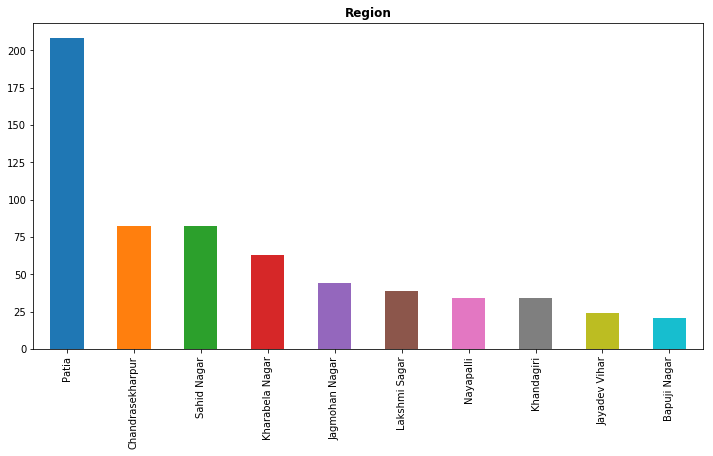

In [10]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

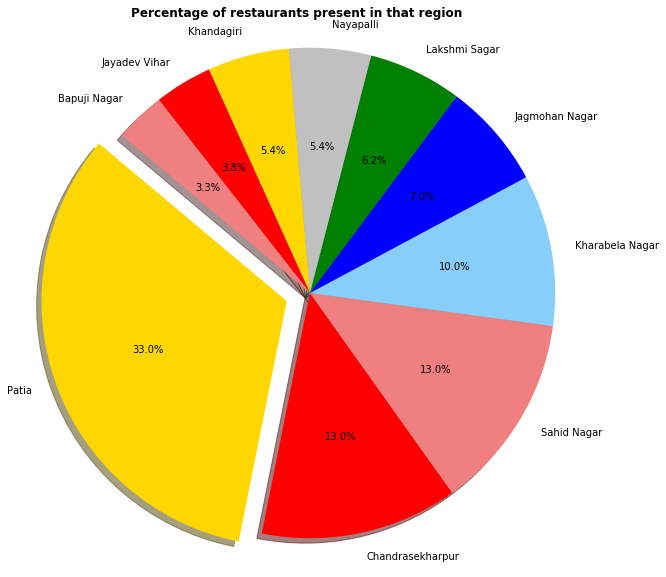

In [12]:
plt.figure(figsize = (10,10))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [13]:
data['Rating_Types'].value_counts().head(10)

Average      410
Good         291
Very Good     89
Excellent      7
Poor           2
Name: Rating_Types, dtype: int64

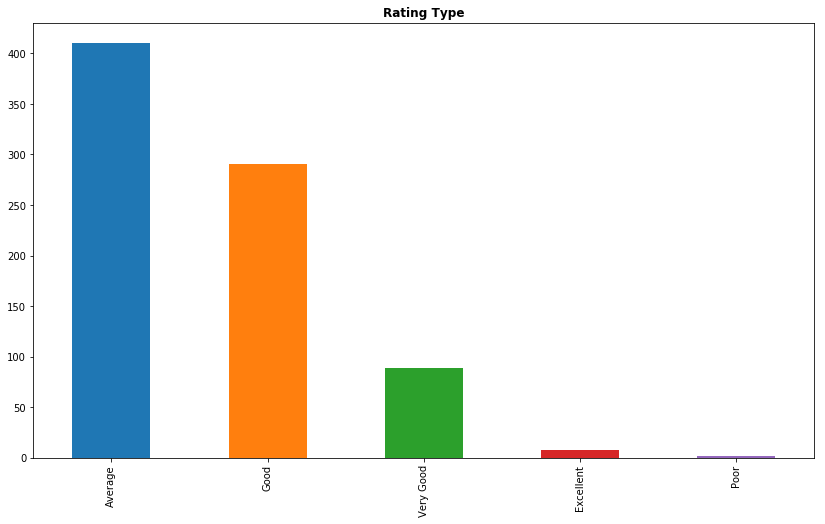

In [14]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [15]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       421
Casual Dining     211
none               54
Café               26
Bakery             25
Dessert Parlor     17
Bar                 9
Food Truck          8
Sweet Shop          7
Fine Dining         6
Name: Cuisine_Type, dtype: int64

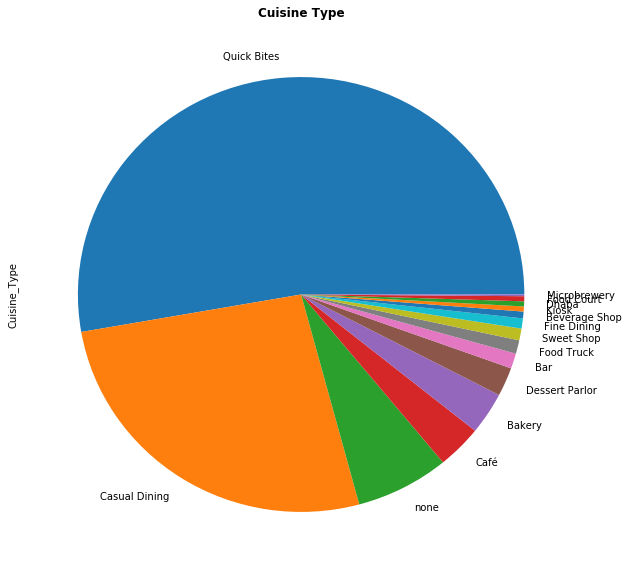

In [16]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [17]:
#We have the most frequently visited Restaurant type - Quickbites

# Ratings

In [18]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [20]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.4564617314930977


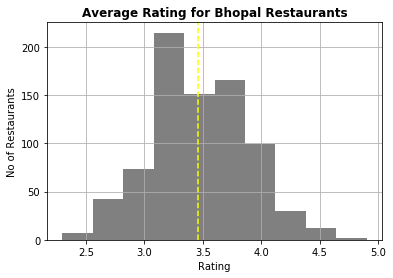

In [21]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Bhopal Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [22]:
#Average rating per restaurant in Ajmer is found to be around 3.4

# Top cuisines in Bhopal 

In [23]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

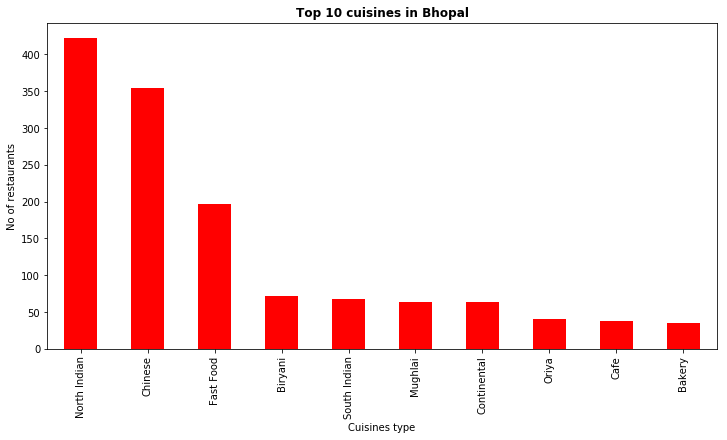

In [24]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Bhopal',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [25]:
data['Price'].value_counts()[:20]

300     142
200     133
500     107
400     101
250      68
600      58
150      27
350      27
800      24
100      22
700      22
450      14
1000      9
550       8
1200      7
650       5
750       5
1500      3
0         3
1400      2
Name: Price, dtype: int64

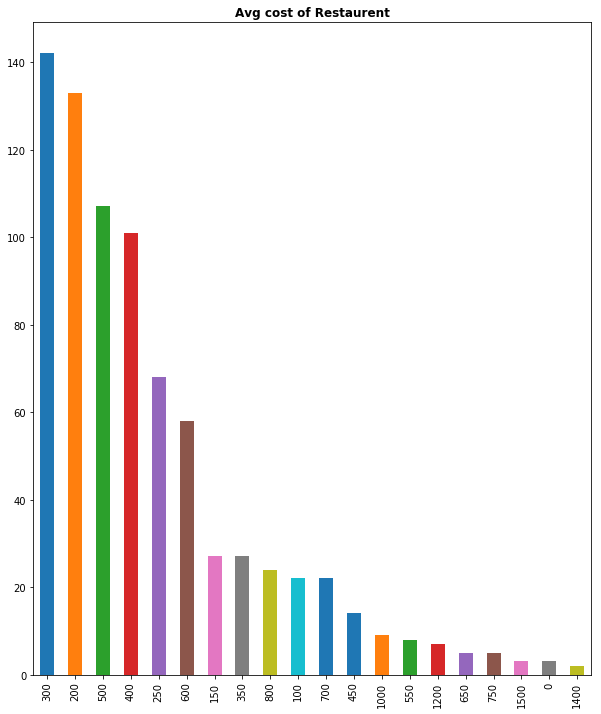

In [26]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [27]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

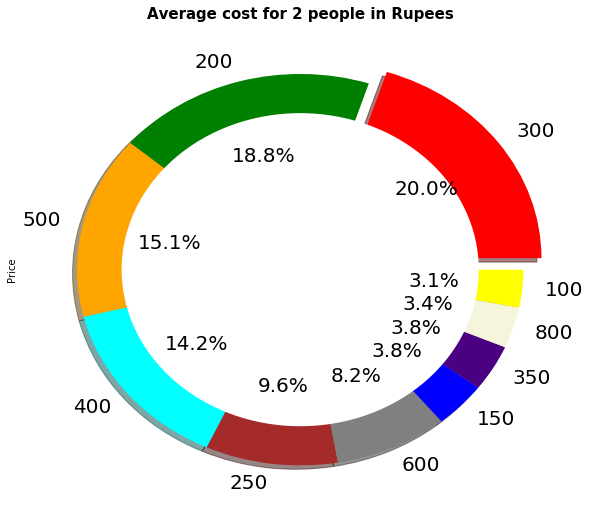

In [28]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 300